# --------- Data Cleaning ---------

# Case Study: Hotel Bookings



## Dataset Explanation
- **hotelHotel:** (H1 = Resort Hotel or H2 = City Hotel)
- **is_canceled:** Value indicating if the booking was canceled (1) or not (0)
- **lead_time:** Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- **arrival_date_year:** Year of arrival date
- **arrival_date_month:** Month of arrival date
- **arrival_date_week_number:** Week number of year for arrival date
- **arrival_date_day_of_month:** Day of arrival date
- **stays_in_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **adults:** Number of adults
- **children:** Number of children
- **babies:** Number of babies
- **meal:** Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country:** Country of origin. Categories are represented in the ISO 3155–3:2013 format
- **market_segment:** Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **distribution_channel:** Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **is_repeated_gues:t** Value indicating if the booking name was from a repeated guest (1) or not (0)
- **previous_cancellations:**  Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled:** Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type:** Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type:** Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes:**  Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type:** Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent:** ID of the travel agency that made the booking
- **company:** ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **days_in_waiting_list:** Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type:** Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr:** Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- **required_car_parking_spaces:** Number of car parking spaces required by the customer
- **total_of_special_requests:** Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status:** Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date:** Date at which the last status was set. This variable can be used in conjunction with the Reservation Status to understand when was the booking canceled or when did the customer checked-out of the hotel

**Objective:**

In this notebook, we are going to go through data cleaning techniques, which are:
- Select and Treat All Missing Value
- Remove unwanted observation (duplicated or irrelevant observation)
- Fix Structure Error in Numerical and Categorical data
- Deal with Correlated variables


In [2]:
# Importing Libraries --


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"D:\0. DATA Science\MA in Data Science\Class Lessons\1. [Module 1] -- PRE PROGRAM CONTENT --- Python - [Jan 4 - Mar 19] - 2023\16. Day 19 - Mar 4 - Python\hotelbookings.csv")

df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [4]:
# We need to get our dataset by using the read_csv function of the pandas library.

### >>> 1. Exploring your Data / Diagnosis Phase <<<

### 1.1 Diagnose Data for Cleaning

When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.

- .head() returns the first few rows (the “head” of the DataFrame).
- .tail() returns the last few rows (the “tail” of the DataFrame).
- .info() shows information on each of the columns, such as the data type and number of missing values.
- .shape returns the number of rows and columns of the DataFrame.
- .columns: An index of columns: the column names.
- .index: An index for the rows: either row numbers or row names.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [7]:
df.shape

(119390, 32)

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=119390, step=1)

Note: Missing values in agent, children, country and company columns (We can see that from the non null count)

### 1.2 Exploratory Data Analysis (EDA)

- describe() method is good for checking on numerical columns
- value_counts() is good for checking on categorical columns

#### Check Unique Values for df column to know whether column type is correct or not --

In [10]:
for i in df.columns:
    x = df[i].value_counts()   #Count the unique values in the colums#
    print("Column Name:", i, "-> Has unique value of:", len(x))

Column Name: hotel -> Has unique value of: 2
Column Name: is_canceled -> Has unique value of: 2
Column Name: lead_time -> Has unique value of: 479
Column Name: arrival_date_year -> Has unique value of: 3
Column Name: arrival_date_month -> Has unique value of: 12
Column Name: arrival_date_week_number -> Has unique value of: 53
Column Name: arrival_date_day_of_month -> Has unique value of: 31
Column Name: stays_in_weekend_nights -> Has unique value of: 17
Column Name: stays_in_week_nights -> Has unique value of: 35
Column Name: adults -> Has unique value of: 14
Column Name: children -> Has unique value of: 5
Column Name: babies -> Has unique value of: 5
Column Name: meal -> Has unique value of: 5
Column Name: country -> Has unique value of: 177
Column Name: market_segment -> Has unique value of: 8
Column Name: distribution_channel -> Has unique value of: 5
Column Name: is_repeated_guest -> Has unique value of: 2
Column Name: previous_cancellations -> Has unique value of: 15
Column Name: 

According to the unqiue values per each column the following columns should be change to 
1. **Categorical Columns:**   mealType, country,market_segment,distribution_channel,reserved_room_type, assigned_room_type, customer_type,reservation_status,arrival_date_month, hotel, arrival_date_year
2. **Boolean:** is_canceled, is_repeated_guest
3. **Int:** children, agent, company, ... 
4. **Date:** reservation_status_date

In [11]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#### After knowing which columns represent categorical data, let's see the counts of each value in these columns --

In [12]:
df_cat = df[['hotel', 'is_canceled', 'arrival_date_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest',  'deposit_type', 'customer_type', 
       'reservation_status', 'reservation_status_date']]

for i in df_cat.columns:
    x=df_cat[i].value_counts()
    print("Column Name: ", i, "and the value counts: ")
    print(x)
    print()

Column Name:  hotel and the value counts: 
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Column Name:  is_canceled and the value counts: 
0    75166
1    44224
Name: is_canceled, dtype: int64

Column Name:  arrival_date_month and the value counts: 
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

Column Name:  meal and the value counts: 
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

Column Name:  country and the value counts: 
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

Column Name:  market_segment and the value counts: 
Online TA    

#### After knowing which columns represent numerical values, lets describe these columns statistically --

In [13]:
df_numerical = df[['lead_time', 'arrival_date_year',
       'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies','previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',  'agent',
       'company', 'days_in_waiting_list',  'adr',
       'required_car_parking_spaces', 'total_of_special_requests']]

df_numerical.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### 1.3 Visual Exploratory Data Analysis (VEDA)

- Sometimes extreme values will stand out much more in a chart
- We use histograms and boxplots for numerical data
- We use bar plots for categorical data

#### Visualizing Numerical Columns --

array([[<AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_year'}>,
        <AxesSubplot:title={'center':'arrival_date_week_number'}>,
        <AxesSubplot:title={'center':'arrival_date_day_of_month'}>],
       [<AxesSubplot:title={'center':'stays_in_weekend_nights'}>,
        <AxesSubplot:title={'center':'stays_in_week_nights'}>,
        <AxesSubplot:title={'center':'adults'}>,
        <AxesSubplot:title={'center':'children'}>],
       [<AxesSubplot:title={'center':'babies'}>,
        <AxesSubplot:title={'center':'previous_cancellations'}>,
        <AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'booking_changes'}>],
       [<AxesSubplot:title={'center':'agent'}>,
        <AxesSubplot:title={'center':'company'}>,
        <AxesSubplot:title={'center':'days_in_waiting_list'}>,
        <AxesSubplot:title={'center':'adr'}>],
       [<AxesSubplot:title={'center':'required_car_parking_spaces'}>

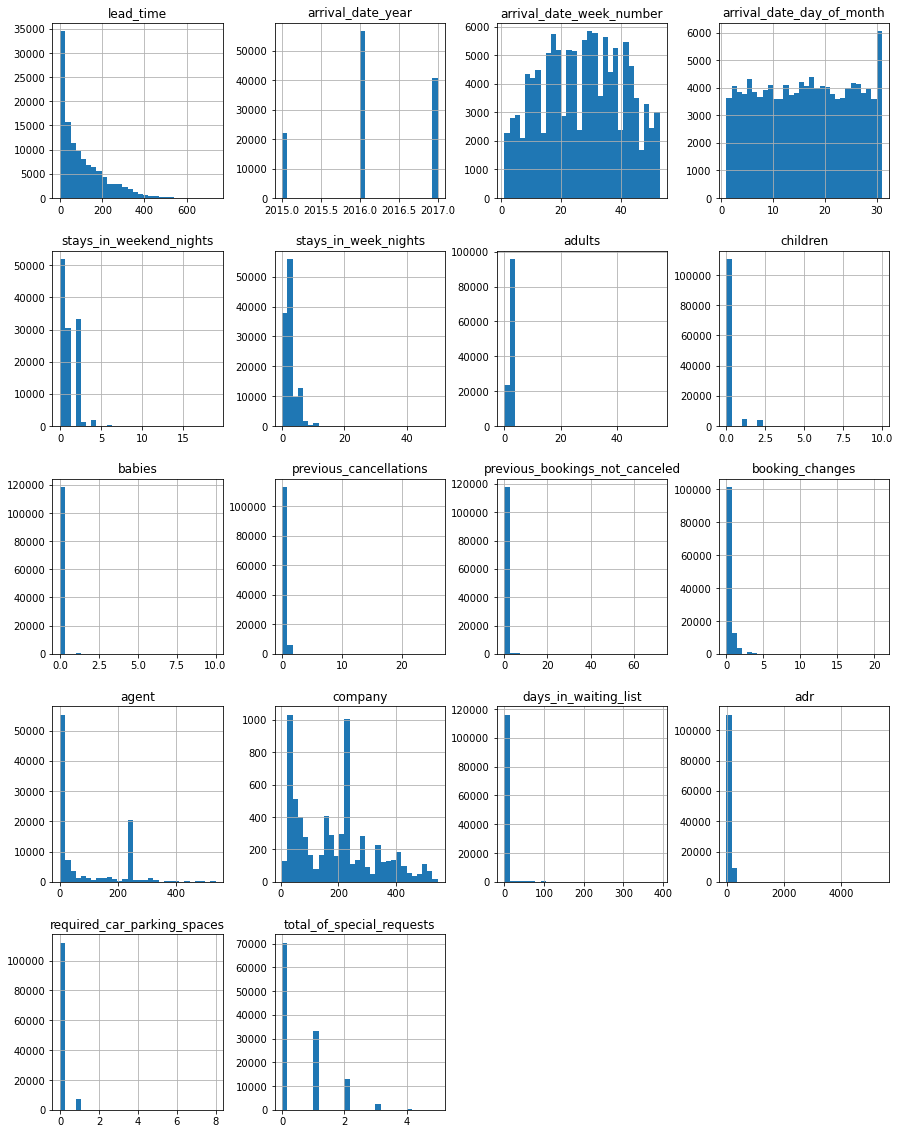

In [14]:
df_numerical.hist(bins=30, figsize=(15,20))

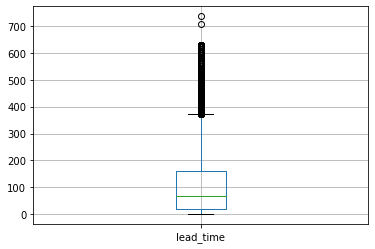

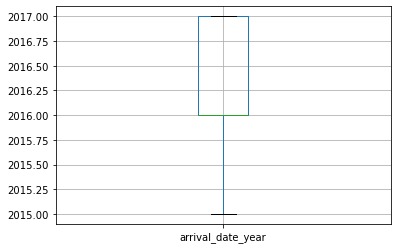

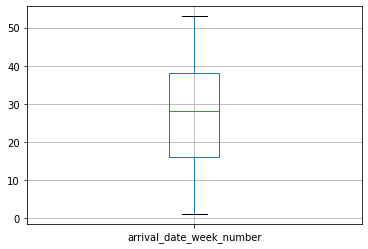

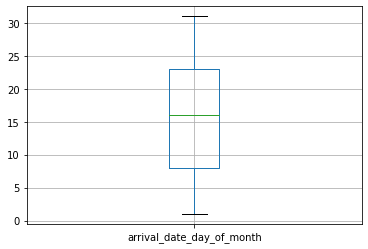

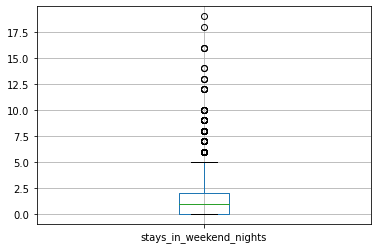

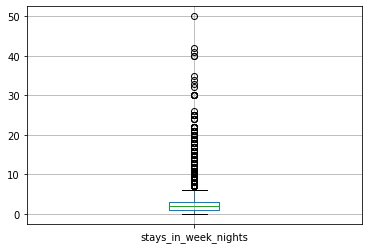

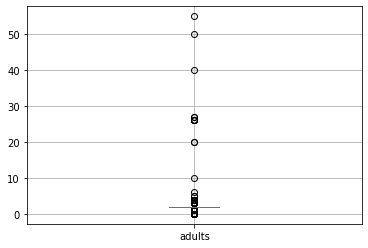

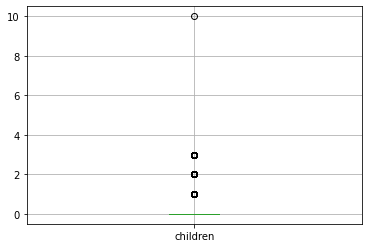

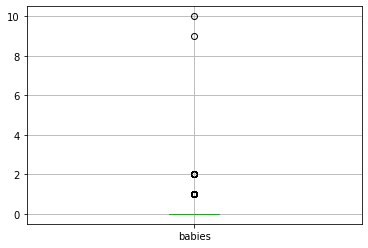

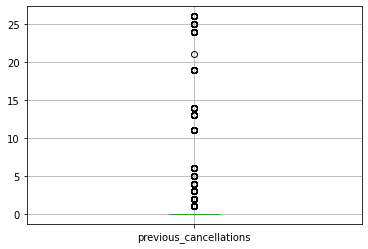

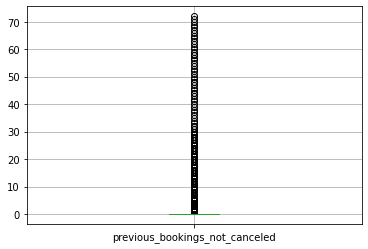

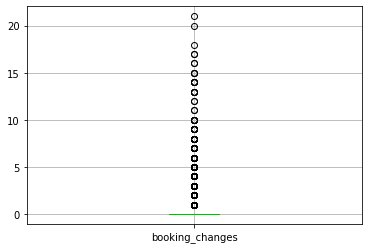

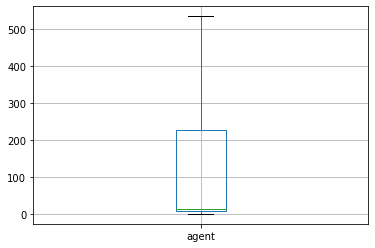

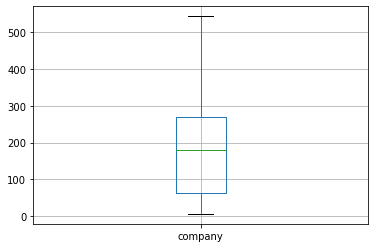

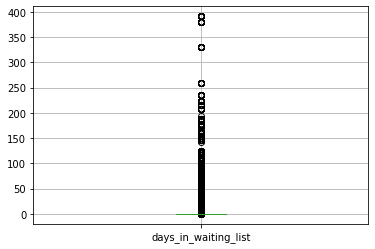

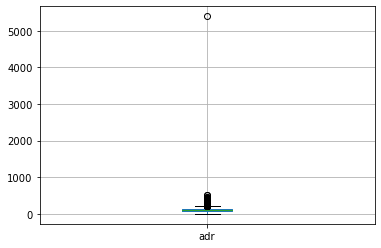

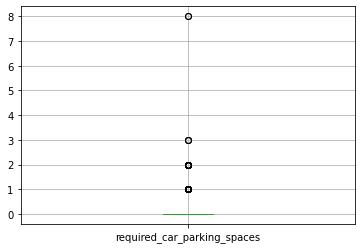

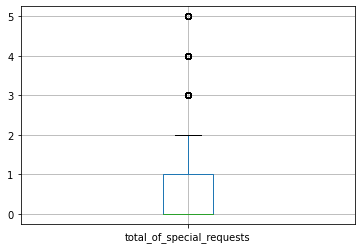

In [15]:
for column in df_numerical:
    plt.figure()
    df.boxplot([column])

Most of the data columns centered around one value, which are:

    - previous_cancellations
    - days_in_waiting_list
    - required_car_parking_spaces
    - previous_bookings_not_canceled
    - booking_changes
    - children
    - babies
    - adr 
    - adult

### >>> 2. Cleaning Data for Analysis <<<

- Fix Structure Error for categorical and numerical data
- Deal with Duplicate and missing data

## 2.1 Fix Structure Error

1. Categorical Data
    - Converting categorical data to 'category' dtype:
    - This makes the DataFrame smaller in memory
    - This makes these columns suitable to be utilized by other Python libraries for analysis
<br><br>
2. Numerical data
    - If you expect the data type of a column to be numeric (int or float), but instead it is of type object, this typically means that there is a non numeric value in the column, which also signifies bad data.
    - You can either use the some techniques to do some exploratory data analysis and find the bad value, or you can choose to ignore or coerce the value into a missing value, NaN.


#### Fix Data Type

#####  <code>Categorical Data Type</code></h2>

The *category data type* in Python will continue to look like a string character to us and in many places will behave like a string (or object) type; however, it is internally being represented by integer values, unique to each category.

Here's how we change to the category dtype

In [17]:
df_cat.head()

,hotel,is_canceled,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,July,BB,PRT,Direct,Direct,0,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,July,BB,PRT,Direct,Direct,0,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,July,BB,GBR,Direct,Direct,0,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,July,BB,GBR,Corporate,Corporate,0,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,July,BB,GBR,Online TA,TA/TO,0,No Deposit,Transient,Check-Out,2015-07-03


In [18]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   hotel                    119390 non-null  object
 1   is_canceled              119390 non-null  int64 
 2   arrival_date_month       119390 non-null  object
 3   meal                     119390 non-null  object
 4   country                  118902 non-null  object
 5   market_segment           119390 non-null  object
 6   distribution_channel     119390 non-null  object
 7   is_repeated_guest        119390 non-null  int64 
 8   deposit_type             119390 non-null  object
 9   customer_type            119390 non-null  object
 10  reservation_status       119390 non-null  object
 11  reservation_status_date  119390 non-null  object
dtypes: int64(2), object(10)
memory usage: 10.9+ MB


In [19]:
for col in df_cat.columns:
    df_cat[col] = df_cat[col].astype("category")

C:\Users\User\AppData\Local\Temp/ipykernel_12384/3094491938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = df_cat[col].astype("category")


Below, we confirm that the dtype has changed to category:

In [20]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   hotel                    119390 non-null  category
 1   is_canceled              119390 non-null  category
 2   arrival_date_month       119390 non-null  category
 3   meal                     119390 non-null  category
 4   country                  118902 non-null  category
 5   market_segment           119390 non-null  category
 6   distribution_channel     119390 non-null  category
 7   is_repeated_guest        119390 non-null  category
 8   deposit_type             119390 non-null  category
 9   customer_type            119390 non-null  category
 10  reservation_status       119390 non-null  category
 11  reservation_status_date  119390 non-null  category
dtypes: category(12)
memory usage: 1.6 MB


#####  <code>Neumerical Data Type</code></h2>

- Convert float to int

In [21]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119390 non-null  int64  
 1   arrival_date_year               119390 non-null  int64  
 2   arrival_date_week_number        119390 non-null  int64  
 3   arrival_date_day_of_month       119390 non-null  int64  
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119386 non-null  float64
 8   babies                          119390 non-null  int64  
 9   previous_cancellations          119390 non-null  int64  
 10  previous_bookings_not_canceled  119390 non-null  int64  
 11  booking_changes                 119390 non-null  int64  
 12  agent           

Running the code result in exception since we have missing values in children, company and agent columns. Hence, we need to handle missing values before converting to int.

#### Clean String Values

Column meal has 4 category: BB, HB, FB, SC, undefined, whereas SC and undefined belong to same category, so we need to group them together.

In [22]:
# First we have to fix 'null' values from the dataset, then we can change 'floats' into 'int':

df_cat.meal.value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [23]:
df_cat.meal = df_cat.meal.str.replace("SC", "Undefined")

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [24]:
df_cat.meal.value_counts()

BB           92310
HB           14463
Undefined    11819
FB             798
Name: meal, dtype: int64

## 2.2 Duplicate and Missing Data

#### Check Duplicates --

In [25]:
# Here we check if there's any duplicated row inside of the dataset:

print(df_numerical.duplicated(subset=None, keep="first"))
print(df_cat.duplicated(subset=None, keep="first"))

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool
0         False
1          True
2         False
3         False
4         False
          ...  
119385     True
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool


In [26]:
print(df_numerical.duplicated(subset=None, keep="first").any())
print(df_cat.duplicated(subset=None, keep="first").any())

True
True


#### Remove Duplicates

In [27]:
# Since there are duplicates, we need to remove them:

df_numerical.drop_duplicates(subset=None, keep="first", inplace=True)
df_cat.drop_duplicates(subset=None, keep="first", inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


#### Re-Check duplicates after the remove operation

In [28]:
# We double check to make sure there are no duplicates anymore:

print(df_numerical.duplicated(subset=None, keep="first").any())
print(df_cat.duplicated(subset=None, keep="first").any())

False
False


#### Check Missing Values

In [29]:
# Here we need to identify the nulls in our dataset:
# Now remove null values:

print(df_cat.isnull().sum(axis=0))

hotel                        0
is_canceled                  0
arrival_date_month           0
meal                         0
country                    391
market_segment               0
distribution_channel         0
is_repeated_guest            0
deposit_type                 0
customer_type                0
reservation_status           0
reservation_status_date      0
dtype: int64


In [30]:
print(df_numerical.isnull().sum(axis=0))

lead_time                             0
arrival_date_year                     0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
previous_cancellations                0
previous_bookings_not_canceled        0
booking_changes                       0
agent                             11326
company                           78629
days_in_waiting_list                  0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
dtype: int64


#### Fill Missing Values

We ususally can fill the nulls with mean, median, mode, etc.
In this example, we chose to fill with the mode.

In [34]:
# Compute the mode of the country, company, agent, and children columns: 
    # country_mode, company_mode, agent_mode, and children_mode

country_mode= df_cat.country.mode()[0]
company_mode = df_numerical.company.mode()[0]
agent_mode = df_numerical.agent.mode()[0]
children_mode = df_numerical.children.mode()[0]




# Replace all the missing values in the 
    #company, country, agent, and children columns with the mode of that column
    
df_cat.country.fillna(country_mode,inplace=True)
df_numerical.company.fillna(company_mode,inplace=True)
df_numerical.agent.fillna(agent_mode,inplace=True)
df_numerical.children.fillna(children_mode, inplace=True)

#### Re-Check Missing Values

In [35]:
# Here, we make sure that there are no missing values anymore:

print(df_cat.isnull().sum(axis=0))

hotel                      0
is_canceled                0
arrival_date_month         0
meal                       0
country                    0
market_segment             0
distribution_channel       0
is_repeated_guest          0
deposit_type               0
customer_type              0
reservation_status         0
reservation_status_date    0
dtype: int64


In [36]:
df_cat.head()

,hotel,is_canceled,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,July,BB,PRT,Direct,Direct,0,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,July,BB,GBR,Direct,Direct,0,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,July,BB,GBR,Corporate,Corporate,0,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,July,BB,GBR,Online TA,TA/TO,0,No Deposit,Transient,Check-Out,2015-07-03
6,Resort Hotel,0,July,BB,PRT,Direct,Direct,0,No Deposit,Transient,Check-Out,2015-07-03


In [37]:
print(df_numerical.isnull().sum(axis=0))

lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64


#### Convert 'float' to 'int'

Now that we've dealt with missing values, we can change the data type from float to int.

*(Note: integer arithmetics are faster than those of floats!)*

In [39]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83387 entries, 0 to 119389
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       83387 non-null  int64  
 1   arrival_date_year               83387 non-null  int64  
 2   arrival_date_week_number        83387 non-null  int64  
 3   arrival_date_day_of_month       83387 non-null  int64  
 4   stays_in_weekend_nights         83387 non-null  int64  
 5   stays_in_week_nights            83387 non-null  int64  
 6   adults                          83387 non-null  int64  
 7   children                        83387 non-null  float64
 8   babies                          83387 non-null  int64  
 9   previous_cancellations          83387 non-null  int64  
 10  previous_bookings_not_canceled  83387 non-null  int64  
 11  booking_changes                 83387 non-null  int64  
 12  agent                          

In [40]:
# To run this program, remove 'null' and 'duplicates':

df_numerical.children = df_numerical.children.astype(int)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [41]:
df_numerical.agent = df_numerical.agent.astype(int)
df_numerical.company = df_numerical.company.astype(int)
df_numerical.adr = df_numerical.adr.astype(int)

In [42]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83387 entries, 0 to 119389
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   lead_time                       83387 non-null  int64
 1   arrival_date_year               83387 non-null  int64
 2   arrival_date_week_number        83387 non-null  int64
 3   arrival_date_day_of_month       83387 non-null  int64
 4   stays_in_weekend_nights         83387 non-null  int64
 5   stays_in_week_nights            83387 non-null  int64
 6   adults                          83387 non-null  int64
 7   children                        83387 non-null  int32
 8   babies                          83387 non-null  int64
 9   previous_cancellations          83387 non-null  int64
 10  previous_bookings_not_canceled  83387 non-null  int64
 11  booking_changes                 83387 non-null  int64
 12  agent                           83387 non-null  int32
 13  